# Data Preparation

## Model misincorporations

In [681]:
''' henry's set up '''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import numpy as np
from Bio import Entrez
import os
import json
import sys
from ete3 import Tree
import importlib


In [682]:
import os
import pandas as pd
# Assuming 'path_to_folder' is the path to the directory containing your .tsv files
path_to_folder = 'mi_model_files'

# Dictionary to store dataframes
dataframes = {}

for filename in os.listdir(path_to_folder):
    if filename.endswith('.tsv'):
        # Extract the file name without the extension
        file_key = filename[:-4]
        # Construct the full file path
        file_path = os.path.join(path_to_folder, filename)
        # Read the TSV file and store it in a dataframe
        dataframes[file_key] = pd.read_csv(file_path, sep='\t')

print(dataframes.keys())



# Loop through the dictionary and create global variables based on the keys
for key in dataframes:
    locals()[key] = dataframes[key]

print(locals().keys())



dict_keys(['halAln', 'halAveCov', 'hand_curated_and_modomics_trnas_w_negatives_09132023_update', 'janAln', 'janAveCov', 'marAln', 'marAveCov', 'modified_sites_df_01092024', 'pyrAln', 'pyrAveCov', 'sacAln', 'sacAveCov', 'sanAln', 'sanAveCov', 'tamAln', 'tamAveCov', 'tkoAln', 'tkoAveCov', 'training_df_01092024'])
dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'pd', 'plt', 'pat', 'np', 'Entrez', 'os', 'json', 'sys', 'Tree', 'importlib', '_i2', 'path_to_folder', 'dataframes', 'filename', 'file_key', 'file_path', 'key', 'halAln', 'halAveCov', 'hand_curated_and_modomics_trnas_w_negatives_09132023_update', 'janAln', 'janAveCov', 'marAln', 'marAveCov', 'modified_sites_df_01092024', 'pyrAln', 'pyrAveCov', 'sacAln', 'sacAveCov', 'sanAln', 'sanAveCov', 'tamAln', 'tamAveCov', 'tkoAln', 'tkoAveCov', 't

In [683]:
# read in tRAX files
'''
tkoCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therKoda1/all_v_all_tRAX/tRAX_CCA_fix_fl/tRAX_CCA_fix_fl-coverage.txt', sep = '\t')
marCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methMari_S2/tRAX_CCA_fix_fl/tRAX_CCA_fix_fl-coverage.txt', sep = '\t')
janCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methJann1/methJann_tRAX_o60/methJann_tRAX_o60-coverage.txt', sep = '\t')
pyrCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/pyrFur2/pyrFur_tRAX_o60/pyrFur_tRAX_o60-coverage.txt', sep = '\t')
sacCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfAcid1/sulfAcid_tRAX_o60/sulfAcid_tRAX_o60-coverage.txt', sep = '\t')
sanCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfIsla_m146/sulfIsla_tRAX_o60/sulfIsla_tRAX_o60-coverage.txt', sep = '\t')
tamCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therSp_AM4/therSp_tRAX_o60/therSp_tRAX_o60-coverage.txt', sep = '\t')
halCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/haloSali1/haloSali_tRAX_o60/haloSali_tRAX_o60-coverage.txt', sep = '\t')


tkoSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therKoda1/all_v_all_tRAX/tRAX_CCA_fix_fl/lazyremap_samples_fl.txt', sep = '\t', header = None, index_col = 0)
marSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methMari_S2/tRAX_CCA_fix_fl/lazyremap_samples_fl.txt', sep = '\t', header = None, index_col = 0)
janSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methJann1/samples_o60.txt', sep = '\t', header = None, index_col = 0)
pyrSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/pyrFur2/samples_o60.txt', sep = '\t', header = None, index_col = 0)
sacSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfAcid1/samples_o60.txt', sep = '\t', header = None, index_col = 0)
sanSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfIsla_m146/samples_o60.txt', sep = '\t', header = None, index_col = 0)
tamSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therSp_AM4/samples_o60.txt', sep = '\t', header = None, index_col = 0)
halSamp = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/haloSali1/samples_o60.txt', sep = '\t', header = None, index_col = 0)

# Process tRAX files
renamePositions =  {'46': 'e18', '47': '46', '64.gap1': '47', '20.gap1': 
                    '20a', '20.gap2': '20b', '17.gap1': '17a', '1.gap1': '0'}#'20.gap3': '20b', '20.gap4': '20b',



tkoCov, tkoAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(tkoCov)), relabelPositions=renamePositions)
marCov, marAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(marCov)), relabelPositions=renamePositions)
janCov, janAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(janCov)), relabelPositions=renamePositions)
pyrCov, pyrAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(pyrCov)), relabelPositions=renamePositions)
sacCov, sacAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(sacCov)), relabelPositions=renamePositions)
sanCov, sanAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(sanCov)), relabelPositions=renamePositions)
tamCov, tamAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(tamCov)), relabelPositions=renamePositions)
halCov, halAln = traxTools.fixTrnaMisalignments(traxTools.computeMI(traxTools.computeNtFrequencies(halCov)), relabelPositions=renamePositions)

# compute average frequencies
tkoAveCov = traxTools.averageTraxCoverageData(tkoSamp, tkoCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
marAveCov = traxTools.averageTraxCoverageData(marSamp, marCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
janAveCov = traxTools.averageTraxCoverageData(janSamp, janCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
pyrAveCov = traxTools.averageTraxCoverageData(pyrSamp, pyrCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
sacAveCov = traxTools.averageTraxCoverageData(sacSamp, sacCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
sanAveCov = traxTools.averageTraxCoverageData(sanSamp, sanCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
tamAveCov = traxTools.averageTraxCoverageData(tamSamp, tamCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
halAveCov = traxTools.averageTraxCoverageData(halSamp, halCov, keepCols= ['tRNAreadstotal', 'coverage', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi'])
'''

"\ntkoCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therKoda1/all_v_all_tRAX/tRAX_CCA_fix_fl/tRAX_CCA_fix_fl-coverage.txt', sep = '\t')\nmarCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methMari_S2/tRAX_CCA_fix_fl/tRAX_CCA_fix_fl-coverage.txt', sep = '\t')\njanCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/methJann1/methJann_tRAX_o60/methJann_tRAX_o60-coverage.txt', sep = '\t')\npyrCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/pyrFur2/pyrFur_tRAX_o60/pyrFur_tRAX_o60-coverage.txt', sep = '\t')\nsacCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfAcid1/sulfAcid_tRAX_o60/sulfAcid_tRAX_o60-coverage.txt', sep = '\t')\nsanCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/sulfIsla_m146/sulfIsla_tRAX_o60/sulfIsla_tRAX_o60-coverage.txt', sep = '\t')\ntamCov = pd.read_csv('/projects/lowelab/users/jsleavit/data/arch_bact_OTTR/therSp_AM4/therSp_tRA

## Summary of Known Mods and Misincorporations

In [684]:
speciesData = {'therKoda':tkoAveCov,
               'therSpec': tamAveCov,
               'pyroFuri': pyrAveCov,
               'sulfAcid': sacAveCov,
               'sulfIsla': sanAveCov,
               'methMari': marAveCov,
               'methJann': janAveCov,
               'haloSali': halAveCov}

conditions = {'therKoda': 'TK_WILDTYPE',
              'methMari': 'WILDTYPE_A',
              'methJann': 'WT_1',
              'pyroFuri': 'WT_1',
              'sulfAcid': 'WT_1',
              'sulfIsla': 'WT_1',
              'haloSali': 'WT_1_o60',
              'therSpec': 'WT_1'}

speciesAlns = {'therKoda': tkoAln,
                'therSpec': tamAln,
                'pyroFuri': pyrAln,
                'sulfAcid': sacAln,
                'sulfIsla': sanAln,
                'methMari': marAln,
                'methJann': janAln,
                'haloSali': halAln}

nameMap = {'therKoda': 'T. kodakarensis',
                'therSpec': 'T. sp. AM4',
                'pyroFuri': 'P. furiosus',
                'sulfAcid': 'S. acidocaldarius',
                'sulfIsla': 'S. islandicus',
                'methMari': 'M. maripaludis',
                'methJann': 'M. jannaschii',
                'haloSali': 'H. salinarum'}


# modification species map 
mods_09132023 = pd.read_csv('mi_model_files/hand_curated_and_modomics_trnas_w_negatives_09132023_update.tsv', sep = '\t')


mod_species_map = {'haloSali_R1_DSM671':'haloSali', 
                    'methJann_DSM2661':'methJann',
                    'methMari_S2': 'methMari',
                     'pyroFuri_DSM3638': 'pyroFuri',
                      'sulfAcid_DSM639':'sulfAcid',
                      'sulfIsla_M_16_4':'sulfIsla',
                      'therKoda_KOD1':'therKoda',
                      'therSp_AM4':'therSpec',
                      'haloVolc_DS2':'haloVolc'}

# replace names in mods_09132023 with names in mod_species_map
mods_09132023['species'] = [mod_species_map.get(i, i) for i in mods_09132023['species']]

# set the index of mods_09132023 to be the species and trna
mods_09132023 = mods_09132023.set_index('trna', drop = True)

# replace all T's with U's
mods_09132023 = mods_09132023.replace('T', 'U', regex = True)

# make a dataframe that pairs known mods with mismatch rates from seqeuenced species
mismatches_and_mods = pd.DataFrame(columns = ['sp','trna', 'position', 'modification', 'actualbase', 'mismatch_rate'])

idx = 0
for sp in speciesData.keys():

    # check if species is in mod_09132023
    if sp in mods_09132023['species'].values:

        # subset for species
        spData = speciesData[sp]
        spModData = mods_09132023[mods_09132023['species'] == sp]
        spModData = spModData[spModData.columns.values[2:]]

        # set Feature as index for spData
        spData = spData.set_index('Feature', drop = False)

        # subset for conditions
        condCov = speciesData[sp][speciesData[sp]['condition'] == conditions[sp]]

        for trna in spData.index.intersection(condCov['Feature']):

            featCov = condCov[condCov['Feature'] == trna].set_index('position')

            # check if seq is in spModData
            if trna not in spModData.index:
                continue
            for pos, refBase in zip(spModData.columns.values, spModData.loc[trna,:]):
                if refBase != '-':
                    try:
                        mismatches_and_mods.loc[idx, :] = [sp, trna, pos, refBase, featCov.loc[pos, 'actualbase'].replace('T','U'), featCov.loc[pos, 'mi']]

                        idx += 1
                    except KeyError:
                        pass
    else:
        continue

mismatches_and_mods
# get modified positions and use to generate table of unmodified "negative" positions

modified_only = mismatches_and_mods[~mismatches_and_mods['modification'].isin(['A', 'U', 'G', 'C', 'N'])]
modified_only = modified_only[modified_only['actualbase'] != '-']


########## get unmodified sites ##########

mod_positions = set(modified_only['position'])


# for p in ['24', '35','66','61', '4', '59','53', '70']:
#     mod_positions.add(p)


unmodified_sites = mismatches_and_mods[~mismatches_and_mods['position'].isin(mod_positions)]

keep_idx = []

for idx, mod, ref in zip(unmodified_sites.index, unmodified_sites['modification'], unmodified_sites['actualbase']):
    if mod == ref:
        keep_idx.append(idx)

    else:
        pass

unmodified_sites = unmodified_sites.loc[keep_idx, :]



########## format modified_only and unmodified_sites ##########



medians = dict()
for mod in set(modified_only['modification']):

    modMIs = modified_only[modified_only['modification'] == mod]
    medians[mod] = np.median(modMIs['mismatch_rate'])

sorted_mods = list(sorted(medians.keys(), key = lambda x: medians[x]))


# build table
trnaModSitesTable = pd.DataFrame(columns = ['mod', 'positions', 'total_sites', 'low_mi', 'high_mi', 'avg_mi', '5%_mi', '0.75%_mi', 'trnas'])


highCutoff = 0.05
lowCutoff = 0.0075

for x, mod in enumerate(sorted_mods):
    modMIs = modified_only[modified_only['modification'] == mod]


    trnas = ', '.join(modMIs['trna'].unique())
    pos = ', '.join(sorted(set(modMIs['position'])))




    trnaModSitesTable.loc[x, :] = [mod, pos, len(modMIs.index.values), 
                                    min(modMIs['mismatch_rate'].to_list()), max(modMIs['mismatch_rate'].to_list()),
                                    np.mean(modMIs['mismatch_rate']), len(modMIs[modMIs['mismatch_rate'] > highCutoff].index.values),
                                    len(modMIs[modMIs['mismatch_rate'] > lowCutoff].index.values), trnas]
                

# add the number of "unmodified" sites
trnaModSitesTable.loc[x+1, :] = ['no mod', '', len(unmodified_sites.index.values),
                                min(unmodified_sites['mismatch_rate'].to_list()), max(unmodified_sites['mismatch_rate'].to_list()),
                                np.mean(unmodified_sites['mismatch_rate']), len(unmodified_sites[unmodified_sites['mismatch_rate'] > highCutoff].index.values),
                                len(unmodified_sites[unmodified_sites['mismatch_rate'] > lowCutoff].index.values), '']




## Build training dataset (Step 1)

builds a dataframe with nucleotide frequencies at all trna positions and additional columns with known mods at the trna+position for all species

In [685]:
# info 


short2original = {'m5Cm': 'C', 'm5s2U': 'U','cnm5s2U':'U' ,'m2,7G': 'G', 'ms2m6A': 'A', 'oQtRNA': 'G', 's4U': 'U', 'm1acp3Y': 'U', 'm4C': 'C', 
                  'io6A': 'A', 'cm5s2U': 'U', 'm5U': 'U', 'm2,2G': 'G', 'D': 'U', 'm4,4C': 'C', 'm6t6A': 'A', 'm5D': 'U', 'm5C': 'C', 
                  'hn6A': 'A', 'Ar(p)': 'A', 'tm5U': 'U', 'm1G': 'G', 'cmnm5Um': 'U', 'Xm': '', 'm1I': 'A', 'mcm5U': 'U', 'Gm': 'G', 
                  'ncm5Um': 'U', 'yW': 'G', 'f5C': 'C', 'm1Am': 'A', 'm1Im': 'A', 'Gr(p)': 'G', 'nm5s2U': 'U', 'm2G': 'G', 'm2A': 'A', 
                  'G': 'G', 'm4Cm': 'C', 'm2,2Gm': 'G', 'm6,6A': 'A', 'gluQtRNA': 'G', 'ncm5U': 'U', 'cm5U': 'U', 'cmnm5s2U': 'U', 'C':'C',
                  'cmo5U': 'U', 'm3Y': 'U', 'm3U': 'U', 'Um': 'U', 'ms2i6A': 'A', 'm3C': 'C', 'cmnm5se2U': 'U', 'ms2t6A': 'A', 'i6A': 'A', 
                  'm3Um': 'U', 'mcmo5U': 'U', 'mimG': 'G', 'U': 'U', 'nm5se2U': 'U', 'm1Gm': 'G', 'ho5U': 'U', 'QtRNA': 'G', 'xG': 'G', 
                  'mcm5s2U': 'U', 'm4,4Cm': 'C', 'xC': 'C', 'yW-86': 'G', 'xA': 'A', 'chm5U': 'U', 'mo5U': 'U', 'acp3U': 'U', 'xU': 'U', 
                  'yW-72': 'G', 'mnm5se2U': 'U', 'ms2hn6A': 'A', 'mcm5Um': 'U', 'ac4C': 'C', 'm6Am': 'A', 'm1A': 'A', 'Cm': 'C', 
                  'mchm5U': 'U', 'galQtRNA': 'G', 'cmnm5U': 'U', 'm1Y': 'U', 'imG2': 'G', 'manQtRNA': 'G', 'tm5s2U': 'U', 's2C': 'C', 
                  'OHyWx': 'G', 'se2U': 'U', 'm6A': 'A', 'OHyW': 'G', 'xX': '', 'G+': 'G', 's2U': 'U', 'k2C': 'C', 'm2Gm': 'G', 'Ym': 'U',
                  'f5Cm': 'C', 'Qbase': 'G', 'ac4Cm': 'C', 'imG-14': 'G', 'A': 'A', 'mnm5s2U': 'U', 'm2,2,7G': 'G', 'yW-58': 'G', 'I': 'A',
                  'g6A': 'A', 'nm5U': 'U', 'm7G': 'G', 's2Um': 'U', 'Y': 'U', 'hm5C': 'C', 'preQ0tRNA': 'G', 'o2yW': 'G', 'm5Um': 'U', 
                  'preQ1tRNA': 'G', 'm6,6Am': 'A', 'ac6A': 'A', 'ms2io6A': 'A', 'Am': 'A', 'Im': 'A', 'mnm5U': 'U', 't6A': 'A', 'm8A': 'A', 
                  'm7Gpp(pN)': 'pppN', 'm2,7Gpp(pN)': 'pppN', 'm2,2,7Gpp(pN)': 'pppN', 'mpp(pN)': 'pppN', 'm2,8A': 'A', 'acp3D': 'U', 
                  'acp3Y': 'U', 'imG': 'G', 'N': '', 'C+': 'C', 'm2,7Gm': 'G', 'ho5C': 'C', 'inm5U': 'U', 'inm5Um': 'U', 'inm5s2U': 'U',
                  'pp(pN)': 'pppN', 'Gpp(pN)': 'pppN', 'CoA(pN)': 'pppN', 'acCoA(pN)': 'pppN', 'malonyl-CoA(pN)': 'pppN', 
                  'succinyl-CoA(pN)': 'pppN', 'p(pN)': 'pppN', 'NAD(pN)': 'pppN', 'OHyWy': 'G', 'pG(pN)': 'pppN', 'ncm5s2U': 'U', 
                  'nchm5U': 'U', 'mchm5Um': 'U', '(pN)': 'pppN', 'ges2U': 'U', 'cmnm5ges2U': 'U', 'mnm5ges2U': 'U', 'nm5ges2U': 'U',
                  '(pN)2′3′>p': 'pppN', 'ct6A': 'A', 'hm6A': 'A', 'f6A': 'A', 'cnm5U': 'U', 'mcmo5Um': 'U', 'ms2ct6A': 'A', 'ht6A': 'A',
                  'msms2i6A': 'A', 'hm5Cm': 'C', '2Hm7G':'G', '2Hm2,7Gm':'G', 'm22Gm':'G', 'imG14':'G'}


speciesData = {'therKoda':tkoAveCov,
               'therSpec': tamAveCov,
               'pyroFuri': pyrAveCov,
               'sulfAcid': sacAveCov,
               'sulfIsla': sanAveCov,
               'methMari': marAveCov,
               'methJann': janAveCov,
               'haloSali': halAveCov}

conditions = {'therKoda': 'TK_WILDTYPE',
              'methMari': 'WILDTYPE_A',
              'methJann': 'WT_1',
              'pyroFuri': 'WT_1',
              'sulfAcid': 'WT_1',
              'sulfIsla': 'WT_1',
              'haloSali': 'WT_1_o60',
              'therSpec': 'WT_1'}

speciesAlns = {'therKoda': tkoAln,
                'therSpec': tamAln,
                'pyroFuri': pyrAln,
                'sulfAcid': sacAln,
                'sulfIsla': sanAln,
                'methMari': marAln,
                'methJann': janAln,
                'haloSali': halAln}

nameMap = {'therKoda': 'T. kodakarensis',
                'therSpec': 'T. sp. AM4',
                'pyroFuri': 'P. furiosus',
                'sulfAcid': 'S. acidocaldarius',
                'sulfIsla': 'S. islandicus',
                'methMari': 'M. maripaludis',
                'methJann': 'M. jannaschii',
                'haloSali': 'H. salinarum'}

mod_species_map = {'haloSali_R1_DSM671':'haloSali', 
                    'methJann_DSM2661':'methJann',
                    'methMari_S2': 'methMari',
                     'pyroFuri_DSM3638': 'pyroFuri',
                      'sulfAcid_DSM639':'sulfAcid',
                      'sulfIsla_M_16_4':'sulfIsla',
                      'therKoda_KOD1':'therKoda',
                      'therSp_AM4':'therSpec',
                      'haloVolc_DS2':'haloVolc'}



# make a temp known mods dataframe with an isotype column
mods_09132023 = pd.read_csv('mi_model_files/hand_curated_and_modomics_trnas_w_negatives_09132023_update.tsv', sep = '\t')

tmp_known_mods = mods_09132023.copy()
tmp_known_mods['isotype'] = [x.split('-')[1] for x in tmp_known_mods['trna']]

# replace the species name using the mod_species_map
tmp_known_mods['species'] = [mod_species_map.get(i, i) for i in tmp_known_mods['species']]


# set the species and trna of known mods as the index
tmp_known_mods = tmp_known_mods.set_index(['species', 'trna'], drop = False)


modified_sites_df = pd.DataFrame(columns = ['species', 'feature', 'position', 'reference_base', 'candidate_mod', 'manual',
                                            'pf_ms_mod','sa_ms_mod','mm_ms_mod','mj_ms_mod','hs_ms_mod', 'tk_ms_mod', 'ts_ms_mod', 'si_ms_mod',
                                            'sample_mismatch_percent', 'pf_mimsmatch_prop', 'sa_mimsmatch_prop', 'mm_mimsmatch_prop', 'mj_mimsmatch_prop', 'hs_mimsmatch_prop', 'tk_mimsmatch_prop', 'ts_mimsmatch_prop', 'si_mimsmatch_prop'])
unmodifiedBases = set(['A', 'U', 'G', 'C', 'T', '-'])

# these are subsets that can be used to get misincorporation rates propotions for each species
pf_sub = speciesData['pyroFuri'][speciesData['pyroFuri']['condition'] == 'WT_1']
sf_sub = speciesData['sulfAcid'][speciesData['sulfAcid']['condition'] == 'WT_1']
mm_sub = speciesData['methMari'][speciesData['methMari']['condition'] == 'WILDTYPE_A']
mj_sub = speciesData['methJann'][speciesData['methJann']['condition'] == 'WT_1']
hs_sub = speciesData['haloSali'][speciesData['haloSali']['condition'] == 'WT_1_o60']
tk_sub = speciesData['therKoda'][speciesData['therKoda']['condition'] == 'TK_WILDTYPE']
ts_sub = speciesData['therSpec'][speciesData['therSpec']['condition'] == 'WT_1']
si_sub = speciesData['sulfIsla'][speciesData['sulfIsla']['condition'] == 'WT_1']


miCutoff2 = 0.0075
#miCutoff2 = 0.0001
idx = 0
for sp in speciesData.keys():
    spData = speciesData[sp]
    spAln = speciesAlns[sp]
    sp_condition = conditions[sp]

    candidateModSites = spData[(spData['actualbase'] != '-') & (spData['condition'] == sp_condition)]
    candidateModSites = candidateModSites[candidateModSites['coverage'] >= 10]

    for trna in set(spData['Feature']):
        trnaModSites = candidateModSites[candidateModSites['Feature'] == trna]

        isotype = trna.split('-')[1]

        # if species isn't in knownMods, the known mods list is empty


        pf_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'pyroFuri') & (tmp_known_mods['isotype'] == isotype)]
        sf_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'sulfAcid') & (tmp_known_mods['isotype'] == isotype)]
        mm_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'methMari') & (tmp_known_mods['isotype'] == isotype)]
        mj_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'methJann') & (tmp_known_mods['isotype'] == isotype)]
        hs_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'haloSali') & (tmp_known_mods['isotype'] == isotype)]
        tk_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'therKoda') & (tmp_known_mods['isotype'] == isotype)]
        ts_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'therSpec') & (tmp_known_mods['isotype'] == isotype)]
        si_isotype_mods = tmp_known_mods[(tmp_known_mods['species'] == 'sulfIsla') & (tmp_known_mods['isotype'] == isotype)]


        for pos in set(candidateModSites['position']):
            modPosSites = trnaModSites[trnaModSites['position'] == pos]

            
            try: pf_mi_prop = pf_sub[(pf_sub['Feature'] == trna) & (pf_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: pf_mi_prop = [0,0,0,0,0,0]

            try: sf_mi_prop = sf_sub[(sf_sub['Feature'] == trna) & (sf_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: sf_mi_prop = [0,0,0,0,0,0]

            try: mm_mi_prop = mm_sub[(mm_sub['Feature'] == trna) & (mm_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: mm_mi_prop = [0,0,0,0,0,0]

            try: mj_mi_prop = mj_sub[(mj_sub['Feature'] == trna) & (mj_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: mj_mi_prop = [0,0,0,0,0,0]

            try: hs_mi_prop = hs_sub[(hs_sub['Feature'] == trna) & (hs_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: hs_mi_prop = [0,0,0,0,0,0]

            try: tk_mi_prop = tk_sub[(tk_sub['Feature'] == trna) & (tk_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: tk_mi_prop = [0,0,0,0,0,0]

            try: ts_mi_prop = ts_sub[(ts_sub['Feature'] == trna) & (ts_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: ts_mi_prop = [0,0,0,0,0,0]

            try: si_mi_prop = si_sub[(si_sub['Feature'] == trna) & (si_sub['position'] == pos)][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0]
            except IndexError: si_mi_prop = [0,0,0,0,0,0]

            
            try:
                if min(modPosSites['mi'].tolist()) >= miCutoff2:

                    # select known mods from different species to use as a reference for predictions
                    pfMod = ''
                    try: pfMod = pf_isotype_mods.loc[('pyroFuri', trna), pos]
                    except KeyError: pass

                    pfItMods = []
                    try: pfItMods = ' '.join(list(set(pf_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    sfMod = ''
                    try: sfMod = sf_isotype_mods.loc[('sulfAcid', trna), pos]
                    except KeyError: pass

                    sfItMods = []
                    try: sfItMods = ' '.join(list(set(sf_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    mmMod = ''
                    try: mmMod = mm_isotype_mods.loc[('methMari', trna), pos]
                    except KeyError: pass

                    mmItMods = []
                    try: mmItMods = ' '.join(list(set(mm_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    mjMod = ''
                    try: mjMod = mj_isotype_mods.loc[('methJann', trna), pos]

                    except KeyError: pass


                    mjItMods = []
                    try: mjItMods = ' '.join(list(set(mj_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    hsMod = ''
                    try: hsMod = hs_isotype_mods.loc[('haloSali', trna), pos]

                    except KeyError: pass

                    hsItMods = []
                    try: hsItMods = ' '.join(list(set(hs_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    tkMod = ''
                    try: tkMod = tk_isotype_mods.loc[('therKoda', trna), pos]
                    except KeyError: pass

                    tkItMods = []
                    try: tkItMods = ' '.join(list(set(tk_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    tsMod = ''
                    try: tsMod = ts_isotype_mods.loc[('therSpec', trna), pos]
                    except KeyError: pass
                    
                    tsItMods = []
                    try: tsItMods = ' '.join(list(set(ts_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    siMod = ''
                    try: siMod = si_isotype_mods.loc[('sulfIsla', trna), pos]
                    except KeyError: pass

                    siItMods = []
                    try: siItMods = ' '.join(list(set(si_isotype_mods[pos]).difference(unmodifiedBases)))
                    except KeyError: pass

                    candidateMod = ' '.join(set([pfMod, sfMod, mmMod, mjMod, hsMod, tkMod, tsMod, siMod]).difference(unmodifiedBases))

                    # check the list of candidate mods, an empyt string causes a key error in the short2original dict
                    if all([x != '' for x in candidateMod.split(' ')]):
        
                        # for any of the candidate mods that have original bases that don't match the reference, replace the candidate mod with empty string
                        candidateMod = ' '.join([x if short2original[x] == modPosSites['actualbase'].tolist()[0] else '' for x in candidateMod.split(' ')])

                                                #candidateMod = ' '.join(set([pfItMods, sfItMods, mmItMods, mjItMods, hsItMods]).difference(unmodifiedBases))
                        modified_sites_df.loc[idx, :] = [sp, trna, pos, modPosSites['actualbase'].tolist()[0], candidateMod, '',
                                                    pfMod, sfMod, mmMod, mjMod, hsMod, tkMod, tsMod, siMod,
                                                    # not a list of list
                                                    modPosSites[['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0],
                                                    pf_mi_prop, sf_mi_prop, mm_mi_prop, mj_mi_prop, hs_mi_prop, tk_mi_prop, ts_mi_prop, si_mi_prop]

                                                        #' '.join([str(round(x*100, 3)) for x in modPosSites['mi']])]
                    else:
                        modified_sites_df.loc[idx, :] = [sp, trna, pos, modPosSites['actualbase'].tolist()[0], '', '',
                                                    pfMod, sfMod, mmMod, mjMod, hsMod, tkMod, tsMod, siMod,
                                                    modPosSites[['A_freq', 'T_freq', 'C_freq', 'G_freq', 'D_freq', 'mi']].values.tolist()[0],
                                                    pf_mi_prop, sf_mi_prop, mm_mi_prop, mj_mi_prop, hs_mi_prop, tk_mi_prop, ts_mi_prop, si_mi_prop]
                                                        #' '.join([str(round(x*100, 3)) for x in modPosSites['mi']])]
                 


            except ValueError:
                pass

            idx += 1

# write out the modified sites dataframe
#modified_sites_df.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/modified_sites_df_01092024.tsv', sep = '\t', index = False)

KeyboardInterrupt: 

## Build training dataset (step 2)

add columns to the dataframe that include the nucleotide frequencies and misincorporations of upstream and downstream positions that have mismatches

In [ ]:
#modified_sites_df = pd.read_csv('modified_sites_with_misincorp_for_training_df.csv', sep = '\t')
modified_sites_df = pd.read_csv('mi_model_files/modified_sites_df_01092024.tsv', sep = '\t')

training_df = pd.DataFrame(columns = ['species', 'feature','position', 'known_mod',  'A_freq', 'T_freq', 'G_freq', 'C_freq', 'del_freq', 'mismatch_freq'])


### modified_sites_df is in wide format, need to convert to long format and add columns for upstream and downstream bases 

# first, subset each species ms_mod column and if the position has a known mod, add it to the training_df
species_short_df_name = {'pf':'pyroFuri', 'sa':'sulfAcid', 'mm':'methMari', 'mj':'methJann', 'hs':'haloSali', 'tk':'therKoda', 'ts':'therSpec', 'si':'sulfIsla'}

for sp in species_short_df_name:
    known_mods_and_misincorp = modified_sites_df[['feature','position',sp + '_ms_mod',sp + '_mimsmatch_prop']]
    species_name = species_short_df_name[sp]

    # make a column with the species name for each row of the subsetted dataframe
    known_mods_and_misincorp['species'] = species_name

    # split the mismatch percent column into separate columns for each base
    mis = known_mods_and_misincorp[sp + '_mimsmatch_prop'].str.split(',', expand = True)

    # remove the left and right brackets from the first and last columns
    mis[0] = mis[0].str.replace('[', '').astype(float)
    mis[5] = mis[5].str.replace(']', '').astype(float)


    # add new columns and rename the species known mod column to known_mod
    known_mods_and_misincorp[['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']] = mis 
    known_mods_and_misincorp.rename(columns = {sp + '_ms_mod': 'known_mod'}, inplace = True)

    # concatenate each of the species to the training_df
    training_df = pd.concat([training_df, known_mods_and_misincorp[['species', 'feature','position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']]])



### now we have a training_df in long format with known mods and mismatch rates for each base

# next, we need to drop the rows with no known mod (i.e. any canonical base or gap) and any rows that are NaN
not_a_mod = ['A', 'T', 'C', 'G', '-', '', 'U']
training_df = training_df[~training_df['known_mod'].isin(not_a_mod)].dropna()


# next, we need to add columns for upstream and downstream misincorporation rates for each mod
positions = list(sorted(set(training_df['position'].astype(int))))

# for each position, subset the training_df and add columns for closest upstream and downstream bases e.g. for position 8, add columns for position 6 and 9 misincorporation rates
upstreams = []
downstreams = []
for pos in positions:

    upstream = pos,np.min([positions[i] if positions[i] > pos else 100 for i in range(len(positions))])
    downstream = pos,np.max([positions[i] if positions[i] < pos else 0 for i in range(len(positions))])

    upstreams.append(upstream)
    downstreams.append(downstream)


# group the training_df by species and feature, if a species and feature combination has a position that matches the upstream or downstream position, add the misincorporation rate to the appropriate column
training_df_w_up = pd.DataFrame(columns = ['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq', 'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq', 'upstream_del_freq', 'upstream_mismatch_freq'])
training_df_w_down = pd.DataFrame(columns = ['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'downstream_A_freq', 'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq', 'downstream_del_freq', 'downstream_mismatch_freq'])

training_df = training_df.set_index(['species', 'feature','position'], drop = True)

# subset to uniuqe species, feature, position combinations
training_df = training_df[~training_df.index.duplicated(keep='first')]
training_df = training_df.reset_index()
training_df = training_df.set_index(['species', 'feature'], drop = True)

# add the upstream misincorporation rates
idx = 0
for index in training_df.index:

    for upstream, downstream in zip(upstreams, downstreams):

        if str(upstream[0]) in training_df.loc[index]['position'].values:

            if str(upstream[1]) in training_df.loc[index]['position'].values:

                training_df_w_up.loc[idx, :] = [[index[0]] + [index[1]] +  list(training_df.loc[index][training_df.loc[index]['position'] == str(upstream[0])][['position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0]) + list(training_df.loc[index][training_df.loc[index]['position'] == str(upstream[1])][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0])][0] 
                idx +=1                                                                                                                                                                                                                                                                                                                                                                                                                                 


# add the downstream misincorporation rates
idx = 0
for index in training_df.index:

    for upstream, downstream in zip(upstreams, downstreams):

        if str(downstream[0]) in training_df.loc[index]['position'].values:

            if str(downstream[1]) in training_df.loc[index]['position'].values:

                training_df_w_down.loc[idx, :] = [[index[0]] + [index[1]] +  list(training_df.loc[index][training_df.loc[index]['position'] == str(downstream[0])][['position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0]) + list(training_df.loc[index][training_df.loc[index]['position'] == str(downstream[1])][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0])][0] 
                idx +=1


up_test = training_df_w_up[training_df_w_up['mismatch_freq'] != 0].reset_index(drop=True).set_index(['species', 'feature', 'position'], drop = True)
down_test = training_df_w_down[training_df_w_down['mismatch_freq'] != 0].reset_index(drop=True).set_index(['species', 'feature', 'position'], drop = True)
up_test = up_test[~up_test.index.duplicated(keep='first')]
down_test = down_test[~down_test.index.duplicated(keep='first')]
up_test = up_test.reset_index()
down_test = down_test.reset_index()
up_test = up_test.set_index(['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq'], drop = True)
down_test = down_test.set_index(['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq'], drop = True)
new_test_df = pd.merge(up_test, down_test, left_index=True, right_index=True, how='outer').fillna(0)
new_test_df = new_test_df.reset_index()


# save this version of the training_df
#training_df.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/training_df_01092024.tsv', sep = '\t', index = False)
#new_test_df.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/training_df_with_up_and_downstream_misincorp_rates_01092024.csv', sep = '\t', index = False)


C:\Users\timmy\AppData\Local\Temp\ipykernel_28392\3006868083.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_mods_and_misincorp['species'] = species_name
C:\Users\timmy\AppData\Local\Temp\ipykernel_28392\3006868083.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_mods_and_misincorp[['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']] = mis
C:\Users\timmy\AppData\Local\Temp\ipykernel_28392\3006868083.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy 

## Make a novel test dataset

Now that we have a trainin set, a test set needs to be built with the same features that were trainied on so that predicitons can be made

In [ ]:
import pandas as pd
import numpy as np
'''
#modified_sites_df = pd.read_csv('modified_sites_with_misincorp_for_training_df.csv', sep = '\t')
modified_sites_df = pd.read_csv('mi_model_files/modified_sites_df_01092024.tsv', sep = '\t')

#novel_test_df = pd.DataFrame(columns = ['species', 'feature','position', 'known_mod',  'A_freq', 'T_freq', 'G_freq', 'C_freq', 'del_freq', 'mismatch_freq'])


### modified_sites_df is in wide format, need to convert to long format and add columns for upstream and downstream bases 

# first, subset each species ms_mod column and if the position has a known mod, add it to the training_df
#species_short_df_name = {'pf':'pyroFuri', 'sa':'sulfAcid', 'mm':'methMari', 'mj':'methJann', 'hs':'haloSali'}
# first, subset each species ms_mod column and if the position has a known mod, add it to the training_df
species_short_df_name = {'pf':'pyroFuri', 'sa':'sulfAcid', 'mm':'methMari', 'mj':'methJann', 'hs':'haloSali', 'tk':'therKoda', 'ts':'therSpec', 'si':'sulfIsla'}

df_segments = []

for sp, species_name in species_short_df_name.items():
    known_mods_and_misincorp = modified_sites_df[['feature','position',f'{sp}_ms_mod',f'{sp}_mimsmatch_prop']].copy()
    known_mods_and_misincorp.rename(columns = {f'{sp}_ms_mod': 'known_mod',
                                               f'{sp}_mismatch_prop': 'mismatch_prop'
                                               }, inplace = True)

    # make a column with the species name for each row of the subsetted dataframe
    known_mods_and_misincorp['species'] = species_name

    # split the mismatch percent column into separate columns for each base
    mismatch_data = temp_df['mismatch_prop'].str.strip('[]').str.split(',', expand=True).astype(float)
    # remove the left and right brackets from the first and last columns
    mis[0] = mis[0].str.replace('[', '').astype(float)
    mis[5] = mis[5].str.replace(']', '').astype(float)

    # add new columns and rename the species known mod column to known_mod
    mismatch_data.columns = [['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']] = mis 

    # concatenate each of the species to the training_df
    novel_test_df  = pd.concat([novel_test_df , known_mods_and_misincorp[['species', 'feature','position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']]])

### next find the upstream and downstream misincorporation rates for each position

# next, we need to add columns for upstream and downstream misincorporation rates for each mod
# if the position can't be converted to an int, it is a gap and we don't want to include it
for pos in novel_test_df['position']:
    try:
        int(pos)
    except ValueError:
        novel_test_df = novel_test_df[novel_test_df['position'] != pos]

positions = list(sorted(set(novel_test_df['position'].astype(int))))

# for each position, subset the training_df and add columns for closest upstream and downstream bases e.g. for position 8, add columns for position 6 and 9 misincorporation rates
upstreams = []
downstreams = []
for pos in positions:

    upstream = pos,np.min([positions[i] if positions[i] > pos else 100 for i in range(len(positions))])
    downstream = pos,np.max([positions[i] if positions[i] < pos else 0 for i in range(len(positions))])

    upstreams.append(upstream)
    downstreams.append(downstream)


# group the training_df by species and feature, if a species and feature combination has a position that matches the upstream or downstream position, add the misincorporation rate to the appropriate column
novel_test_df_w_up = pd.DataFrame(columns = ['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq', 'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq', 'upstream_del_freq', 'upstream_mismatch_freq'])
novel_test_df_w_down = pd.DataFrame(columns = ['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'downstream_A_freq', 'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq', 'downstream_del_freq', 'downstream_mismatch_freq'])

novel_test_df = novel_test_df.set_index(['species', 'feature','position'], drop = True)

# subset to uniuqe species, feature, position combinations
novel_test_df = novel_test_df[~novel_test_df.index.duplicated(keep='first')]
novel_test_df = novel_test_df.reset_index()
novel_test_df = novel_test_df.set_index(['species', 'feature'], drop = True)

# add the upstream misincorporation rates
idx = 0
for index in novel_test_df.index:

    for upstream, downstream in zip(upstreams, downstreams):

        if str(upstream[0]) in novel_test_df.loc[index]['position'].values:

            if str(upstream[1]) in novel_test_df.loc[index]['position'].values:

                novel_test_df_w_up.loc[idx, :] = [[index[0]] + [index[1]] +  list(novel_test_df.loc[index][novel_test_df.loc[index]['position'] == str(upstream[0])][['position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0]) + list(novel_test_df.loc[index][novel_test_df.loc[index]['position'] == str(upstream[1])][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0])][0] 
                idx +=1                                                                                                                                                                                                                                                                                                                                                                                                                                 

#
# add the downstream misincorporation rates
idx = 0
for index in novel_test_df.index:

    for upstream, downstream in zip(upstreams, downstreams):

        if str(downstream[0]) in novel_test_df.loc[index]['position'].values:

            if str(downstream[1]) in novel_test_df.loc[index]['position'].values:

                novel_test_df_w_down.loc[idx, :] = [[index[0]] + [index[1]] +  list(novel_test_df.loc[index][novel_test_df.loc[index]['position'] == str(downstream[0])][['position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0]) + list(novel_test_df.loc[index][novel_test_df.loc[index]['position'] == str(downstream[1])][['A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq']].values[0])][0] 
                idx +=1

      
up_test = novel_test_df_w_up[novel_test_df_w_up['mismatch_freq'] != 0].reset_index(drop=True).set_index(['species', 'feature', 'position'], drop = True)
down_test = novel_test_df_w_down[novel_test_df_w_down['mismatch_freq'] != 0].reset_index(drop=True).set_index(['species', 'feature', 'position'], drop = True)
up_test = up_test[~up_test.index.duplicated(keep='first')]
down_test = down_test[~down_test.index.duplicated(keep='first')]
up_test = up_test.reset_index()
down_test = down_test.reset_index()
up_test = up_test.set_index(['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq'], drop = True)
down_test = down_test.set_index(['species', 'feature', 'position', 'known_mod', 'A_freq', 'T_freq', 'C_freq', 'G_freq', 'del_freq', 'mismatch_freq'], drop = True)

# merge on index
merged_novel_df = pd.merge(up_test, down_test, left_index=True, right_index=True, how='outer').fillna(0)
merged_novel_df = merged_novel_df.reset_index()
'''
test_noveldf = pd.read_csv('mi_model_files/merged_novel_misincorporations_df_with_SVM_predictions_01092024.csv', sep = '\t')
# for saving the dataframes generated above 
#novel_test_df_w_up.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/novel_test_df_w_up_01092024.csv', sep = '\t')
#novel_test_df_w_down.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/novel_test_df_w_down_01092024.csv', sep = '\t')
#merged_novel_df.to_csv('/projects/lowelab/users/jsleavit/data/mod_pred/mi_model_files/merged_novel_misincorporations_df_01092024.csv', sep = '\t')


## Dimension reduction of training data

Let's look if there are clear relationships of mincorporation patterns across species 

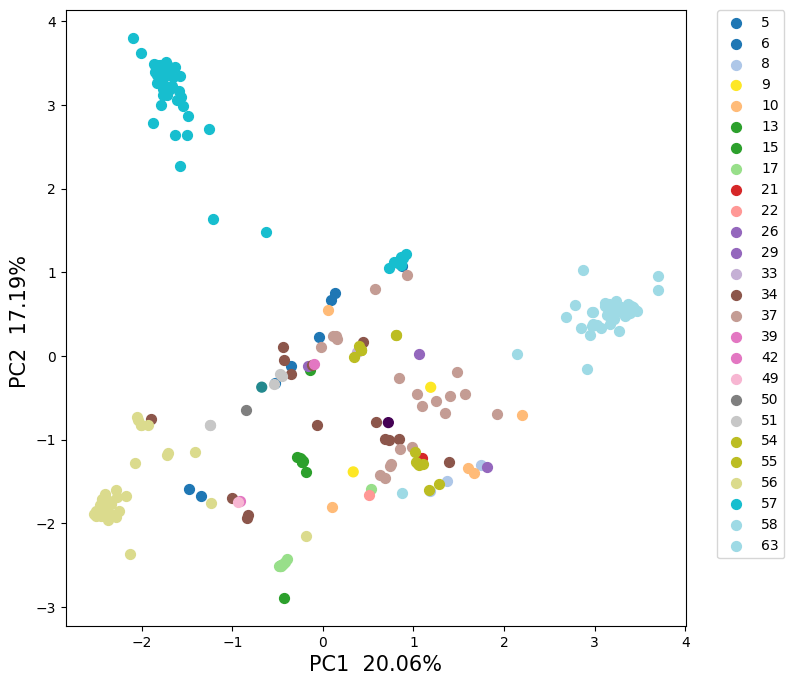

In [686]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd

#test_training_df = pd.read_csv('training_df_with_up_and_downstream_misincorp_rates.csv', sep = '\t')
test_training_df = pd.read_csv('mi_model_files/training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01092024.csv', sep = '\t')
test_training_df = test_training_df.iloc[:-100]
# let's do a pca of the misincorporation rates to see if there are any obvious clusters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

# subset the training_df to only include misincorporation rates
misincorp_rates = test_training_df[['A_freq', 'T_freq',
       'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq',
       'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq',
       'upstream_del_freq', 'upstream_mismatch_freq', 'downstream_A_freq',
       'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq',
       'downstream_del_freq', 'downstream_mismatch_freq']]

# standardize the misincorporation rates
misincorp_rates = StandardScaler().fit_transform(misincorp_rates)

# run pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(misincorp_rates)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# add the position and known mod columns back to the dataframe
principalDf[['species', 'feature', 'position', 'known_mod']] = test_training_df[['species', 'feature', 'position', 'known_mod']]
principalDf = principalDf.set_index(['species', 'feature', 'position', 'known_mod'], drop = True)

# plot the pca
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

# find the percent variance explained by each component
var = pca.explained_variance_ratio_
var1 = round(var[0]*100, 2)
var2 = round(var[1]*100, 2)
ax.set_xlabel('PC1  {}%'.format(var1), fontsize = 15)
ax.set_ylabel('PC2  {}% '.format(var2), fontsize = 15)

positions = list(sorted(set(principalDf.index.get_level_values('position').astype(int))))


# use a color map to color each position
colors = cm.tab20(np.linspace(0, 1, len(positions)))

for pos, color in zip(positions, colors):
    idx = principalDf.index.get_level_values('position') == int(pos)
    ax.scatter(principalDf.loc[idx, 'principal component 1']
               , principalDf.loc[idx, 'principal component 2']
               , c = color
               , s = 50)

# set legend outside of plot
ax.legend(positions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



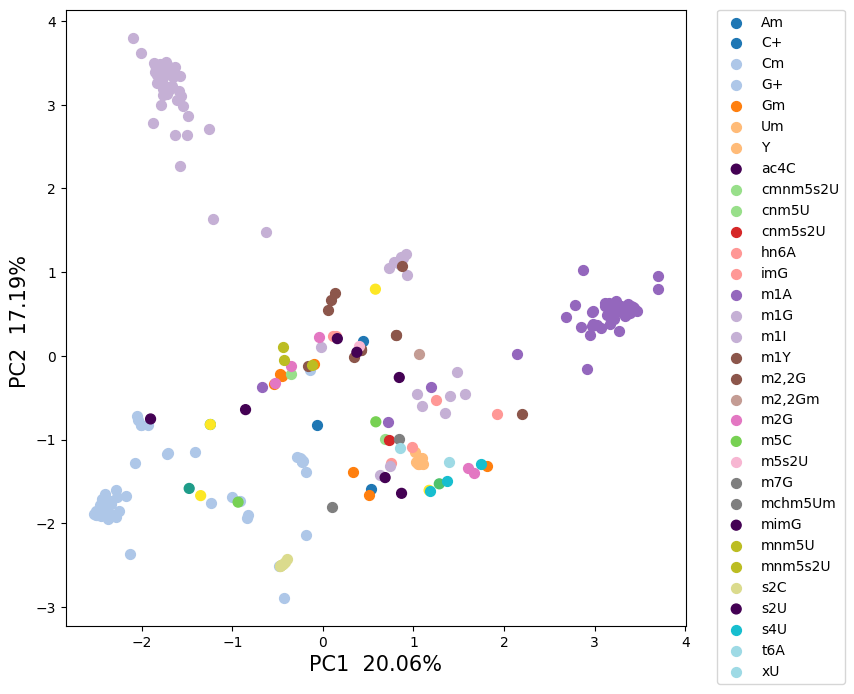

In [687]:
# plot the pca
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

# find the percent variance explained by each component
var = pca.explained_variance_ratio_
var1 = round(var[0]*100, 2)
var2 = round(var[1]*100, 2)
ax.set_xlabel('PC1  {}%'.format(var1), fontsize = 15)
ax.set_ylabel('PC2  {}% '.format(var2), fontsize = 15)


modifications = list(sorted(set(principalDf.index.get_level_values('known_mod'))))

colors = cm.tab20(np.linspace(0, 1, len(modifications)))

for mod, color in zip(modifications, colors):
    idx = principalDf.index.get_level_values('known_mod') == mod
    ax.scatter(principalDf.loc[idx, 'principal component 1']
               , principalDf.loc[idx, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(modifications, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## Negative controls 

In [688]:
import pandas as pd

# Load your novel test dataset
novel_test_df = pd.read_csv('mi_model_files/training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01092024.csv', sep = '\t')

# Calculate and print the number of each modification type in the dataset
modification_counts = novel_test_df['known_mod'].value_counts()
#print(modification_counts)

class_labels = novel_test_df['known_mod'].unique()
class_labels

#principalDf = pd.concat([principalDf, novel_test_df[-100:]])
principalDf.iloc[:-1]


principal component 1  \
species  feature        position known_mod                          
haloSali tRNA-Ala-CGC-1 56       Cm                     -1.929522   
                        57       m1I                     0.832308   
         tRNA-Arg-GCG-1 56       Cm                     -2.005130   
                        57       m1I                     0.784076   
         tRNA-Gly-GCC-1 54       m1Y                     0.414980   
...                                                           ...   
therKoda tRNA-Trp-CCA-1 37       mimG                    0.579527   
                        54       m5s2U                   0.393708   
                        55       Y                       1.104707   
                        56       Cm                     -2.133066   
                        57       m1I                    -1.795590   

                                            principal component 2  
species  feature        position known_mod                         
haloSali tRNA-Ala-CGC-1 56       Cm                     -0.824806  
                        57       m1I                     1.108212  
         tRNA-Arg-GCG-1 56       Cm                     -0.821457  
                        57       m1I                     1.125451  
         tRNA-Gly-GCC-1 54       m1Y                     0.076502  
...                                                           ...  
therKoda tRNA-Trp-CCA-1 37       mimG                    0.796632  
                        54       m5s2U                   0.120014  
                        55       Y                      -1.288418  
                        56       Cm                     -2.370145  
                        57       m1I                     3.456506  

[248 rows x 2 columns]

# Output Visualization Methods
- Prints Standard & Normalized Confusion Matrices, Comparison histogram, PCA, Feature Importance

## Plot PCA

In [689]:

# Function for performing PCA and plotting the results
def plot_pca(X, labels, features_df, explained_variance):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    principalDf[['species', 'feature', 'position', 'known_mod']] = features_df[['species', 'feature', 'position', 'known_mod']]
    principalDf = principalDf.set_index(['species', 'feature', 'position', 'known_mod'], drop=True)
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    var1, var2 = explained_variance[:2]
    ax.set_xlabel(f'PC1 {var1*100:.2f}%')
    ax.set_ylabel(f'PC2 {var2*100:.2f}%')

    colors = cm.tab20(np.linspace(0, 1, len(labels)))
    for mod, color in zip(labels, colors):
        idx = principalDf.index.get_level_values('known_mod') == mod
        ax.scatter(principalDf.loc[idx, 'principal component 1'], principalDf.loc[idx, 'principal component 2'], c=color, s=50)
    
    ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

## Plot Confusion Matrices

In [728]:
# Function for plotting confusion matrices
def plot_confusion_matrices(y_true, y_pred, labels, x=19, y=13):
    plt.figure(figsize=(x, y))
    ax = plt.subplot(1,1,1)
    sns.heatmap(confusion_matrix(y_true, y_pred, labels=labels, normalize='true'), annot=True, fmt='.2f')
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix w/ Normalization')
    '''
    ax = plt.subplot(2,1,2)
    sns.heatmap(confusion_matrix(y_true, y_pred, labels=labels), annot=True)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix w/ Support')
    '''
    plt.show()

## Plot Feature Importance

In [691]:
def print_feature_importances(features, importances):
    feature_importance_dict = dict(zip(features, importances))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    
    print("\nFeature importances:")
    for item in sorted_feature_importance:
        print(item[0], ': ', item[1])
    
    plt.figure(figsize=(14, 7))
    plt.title("Feature importances")
    sns.barplot(x=[item[1] for item in sorted_feature_importance], y=[item[0] for item in sorted_feature_importance])
    plt.show()

##  Plot Histogram

In [760]:
import numpy as np
import matplotlib.pyplot as plt

def plot_prediction_histogram(y_true, y_pred, class_labels, other_pred=None):
    """
    Plots grouped histograms for the distribution of true and predicted classes.
    
    Args:
        y_true (numpy array): True class indices.
        y_pred (numpy array): Predicted class indices.
        class_labels (list): List of class labels.
    """
    # Initialize the count dictionaries
    true_label_counts = {label: 0 for label in class_labels}
    pred_label_counts = {label: 0 for label in class_labels}
    
    # Count occurrences of each label
    for label in y_true:
        true_label_counts[label] += 1
    for label in y_pred:
        pred_label_counts[label] += 1
    
    if other_pred is not None:
        other_pred_label_counts = {label: 0 for label in class_labels}
        for label in other_pred:
            other_pred_label_counts[label] += 1
    
    # Set up the figure and axes for the plot
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Set the positions of the bars on the x-axis
    x = np.arange(len(class_labels))
    
    # Make the plot
    ax.bar(x - 0.3, [pred_label_counts[label] for label in class_labels], width=0.2, label='RF Predicted', color='red')
    ax.bar(x - 0.1, [true_label_counts[label] for label in class_labels], width=0.2, label='True', color='black')
    ax.bar(x + 0.1, [other_pred_label_counts[label] for label in class_labels], width=0.2, label='SVM Predicted', color='blue')
    
    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Frequency')
    ax.set_title('True vs Predicted Class Distribution')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels, rotation=90)
    ax.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Number of classes - replace with your actual number of classes
num_classes = 46  # Replace 46 with the actual number of classes in your dataset

# Generate and plot histograms
# Ensure y_true and y_pred are numpy arrays containing class indices for true and predicted labels respectively


In [693]:
import os
import pandas as pd

# Specify the directory containing the .csv and .tsv files
directory = 'mi_model_file/'

# Iterate through all files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') or filename.endswith('.tsv'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        df = pd.read_csv(filepath, sep='\t')
        
        # Print the filename and the first 5 rows of the DataFrame
        print(f"File: {filename}")
        print(df.head(5))
        print('\n')  # Add a newline for better readability between files


File: hand_curated_and_modomics_trnas_w_negatives_09132023_update.tsv
              species            trna  1  2  3  4  5  6  7  8  ... 67 68 69  \
0  haloSali_R1_DSM671  tRNA-Ala-CGC-1  G  G  G  C  U  C  G  U  ...  G  A  G   
1  haloSali_R1_DSM671  tRNA-Arg-GCG-1  G  U  C  C  G  G  A  U  ...  C  C  G   
2  haloSali_R1_DSM671  tRNA-Asn-GTT-1  G  C  C  G  C  C  A  U  ...  G  G  C   
3  haloSali_R1_DSM671  tRNA-Gln-CTG-1  A  G  U  C  C  C  G  U  ...  G  G  G   
4  haloSali_R1_DSM671  tRNA-Gly-GCC-1  G  C  G  C  U  G  G  U  ...  C  A  G   

  70 71 72 73 74 75 76  
0  U  C  C  A  C  C  A  
1  G  A  C  G  C  C  A  
2  G  G  C  G  A  A  C  
3  A  C  U  A  C  C  A  
4  C  G  C  A  C  C  A  

[5 rows x 100 columns]


File: merged_novel_misincorporations_df_with_SVM_predictions_01092024.csv
   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   species  \
0             0             0             0           0  haloSali   
1             1             1             1           1  haloSali  

# Classifier Cells

## Random Forest Classifier

In [762]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np




test_training_df = pd.read_csv('mi_model_files/training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01092024.csv', sep = '\t')

misincorp_rates = ['known_mod','A_freq', 'T_freq',
       'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq',
       'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq',
       'upstream_del_freq', 'upstream_mismatch_freq', 'downstream_A_freq',
       'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq',
       'downstream_del_freq', 'downstream_mismatch_freq']

# Assuming you have prepared a final DataFrame from your previous steps
# Let's call this DataFrame 'final_df' and assume it's already loaded
# Replace 'path_to_your_final_dataframe.csv' with the actual path to your CSV file containing the tRNA modification data
final_df = pd.read_csv('mi_model_files/merged_novel_misincorporations_df_with_SVM_predictions_01092024.csv', sep = '\t').iloc[:,:-1]
final_df = final_df[['known_mod', 'A_freq', 'T_freq',
       'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq',
       'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq',
       'upstream_del_freq', 'upstream_mismatch_freq', 'downstream_A_freq',
       'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq',
       'downstream_del_freq', 'downstream_mismatch_freq']].dropna()


# The features are everything except the label column, which we'll assume is named 'modification'
X = test_training_df[misincorp_rates[1:]]   # or 'known_mod' based on your dataset
y = test_training_df['known_mod']  # or 'known_mod'

# Random Forest doesn't necessarily require feature scaling but doing so won't harm

label_encoder = LabelEncoder()
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=500,  # Try decreasing to speed up or increasing for possibly better accuracy but longer training time
    max_depth=15,  # Try lowering for less complex models or increasing to allow more complex decisions
    min_samples_split=5,  # Increase for less overfitting
    min_samples_leaf=1,  # Increase for less overfitting at the cost of model complexity
    max_features='sqrt',  # Try 'log2' or 'sqrt' or even lower fractions to reduce the number of features considered for splits
    bootstrap=True,  # Keep as True, but can experiment with False
    class_weight='balanced',  # 'balanced_subsample' is similar to 'balanced' but computed with each bootstrap sample
    random_state=33  # Keep for reproducibility
)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)


'''



# Set up the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 500, 750],  # Number of trees in the forest
    'max_depth': [10, 15, 25],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initialize the RF model
rf_model = RandomForestClassifier(
       random_state=33,
       bootstrap=True,  # Method of selecting samples for training each tree
       class_weight='balanced',  # Weights associated with classes in the form {class_label: weight}
       max_features='sqrt'
)  # Number of features to consider when looking for the best split)

# Initialize the Grid Search model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=10), n_jobs=-1, verbose=3, scoring='accuracy')

# Fit the Grid Search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best accuracy found: ", grid_search_rf.best_score_)

y_pred = grid_search_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

'''



'\n\n\n\n# Set up the parameter grid to search\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 500, 750],  # Number of trees in the forest\n    \'max_depth\': [10, 15, 25],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 4, 5, 10],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],  # Minimum number of samples required to be at a leaf node\n}\n\n# Initialize the RF model\nrf_model = RandomForestClassifier(\n       random_state=33,\n       bootstrap=True,  # Method of selecting samples for training each tree\n       class_weight=\'balanced\',  # Weights associated with classes in the form {class_label: weight}\n       max_features=\'sqrt\'\n)  # Number of features to consider when looking for the best split)\n\n# Initialize the Grid Search model\ngrid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=10), n_jobs=-1, verbose=3, scoring=\'accuracy\')\n\n# Fit the Grid Sear

Accuracy: 0.8071428571428572

Feature importances:
C_freq :  0.10595310802421176
T_freq :  0.1057134544573305
mismatch_freq :  0.09236263781776163
del_freq :  0.06951558068404726
G_freq :  0.06897715727203706
upstream_A_freq :  0.0665954036879205
downstream_T_freq :  0.06350056740345958
A_freq :  0.05859123793431591
upstream_T_freq :  0.04864824464338948
upstream_C_freq :  0.047660004576239756
upstream_mismatch_freq :  0.04553661924565251
upstream_G_freq :  0.04521072883676295
downstream_mismatch_freq :  0.03939547159826647
upstream_del_freq :  0.035642150792736575
downstream_G_freq :  0.03512580924529112
downstream_del_freq :  0.03057198636976441
downstream_C_freq :  0.03049841917160629
downstream_A_freq :  0.010501418239206233


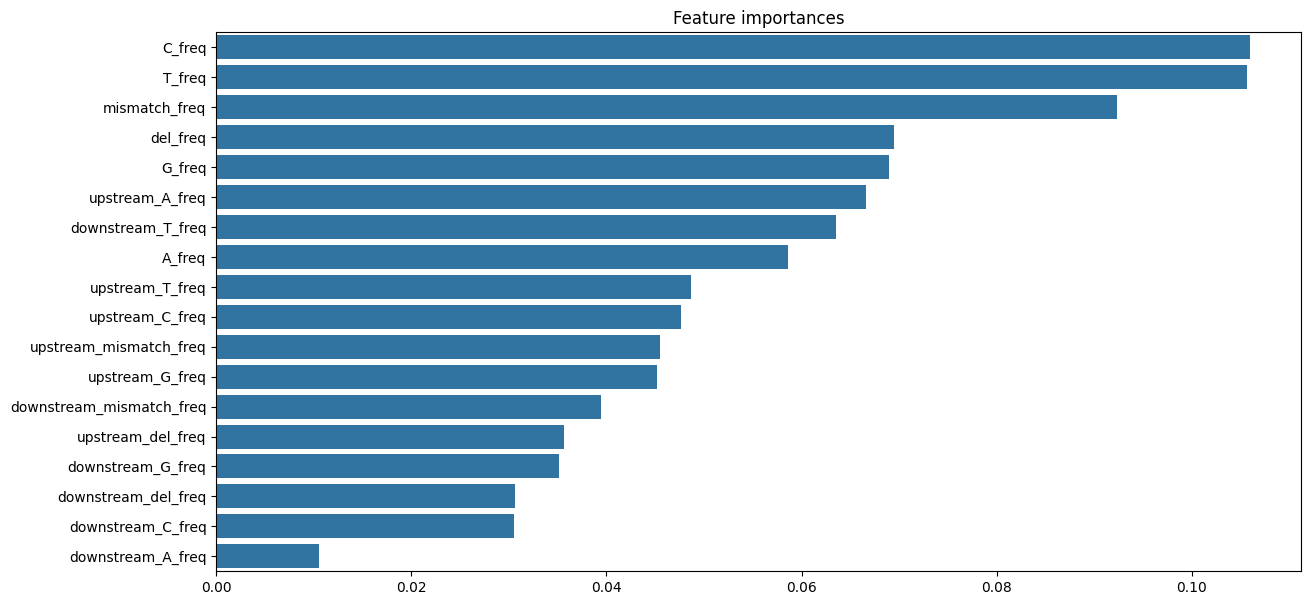

Classification Report:
               precision    recall  f1-score   support

          Am       0.00      0.00      0.00         1
          C+       0.00      0.00      0.00         1
          Cm       1.00      0.86      0.92        21
          G+       0.83      0.83      0.83         6
          Gm       0.33      0.50      0.40         2
           Y       1.00      1.00      1.00         2
        ac4C       1.00      1.00      1.00         1
       cnm5U       0.00      0.00      0.00         1
        hn6A       1.00      0.33      0.50         3
         m1A       1.00      0.83      0.90        23
         m1G       0.50      0.50      0.50         2
         m1I       0.96      1.00      0.98        23
         m1Y       0.67      1.00      0.80         2
       m2,2G       0.00      0.00      0.00         1
         m2G       0.00      0.00      0.00         1
         m5C       0.00      0.00      0.00         2
         m7G       0.00      0.00      0.00         1
   

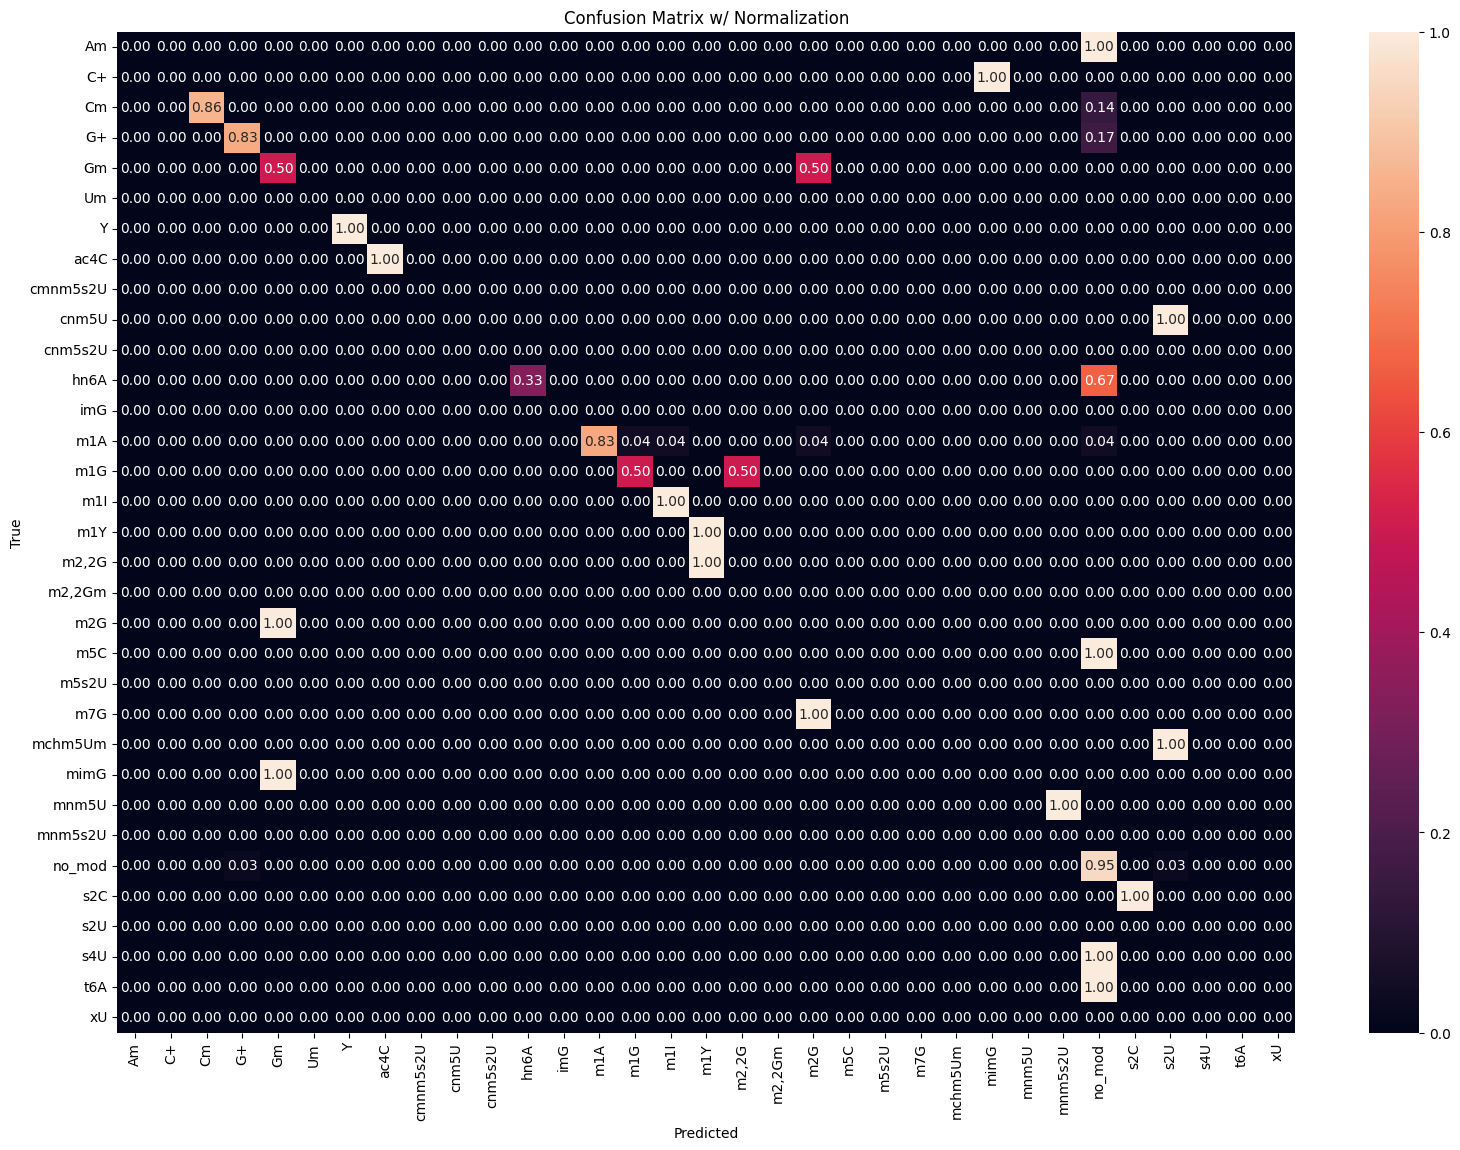

NameError: cannot access free variable 'other_pred_label_counts' where it is not associated with a value in enclosing scope

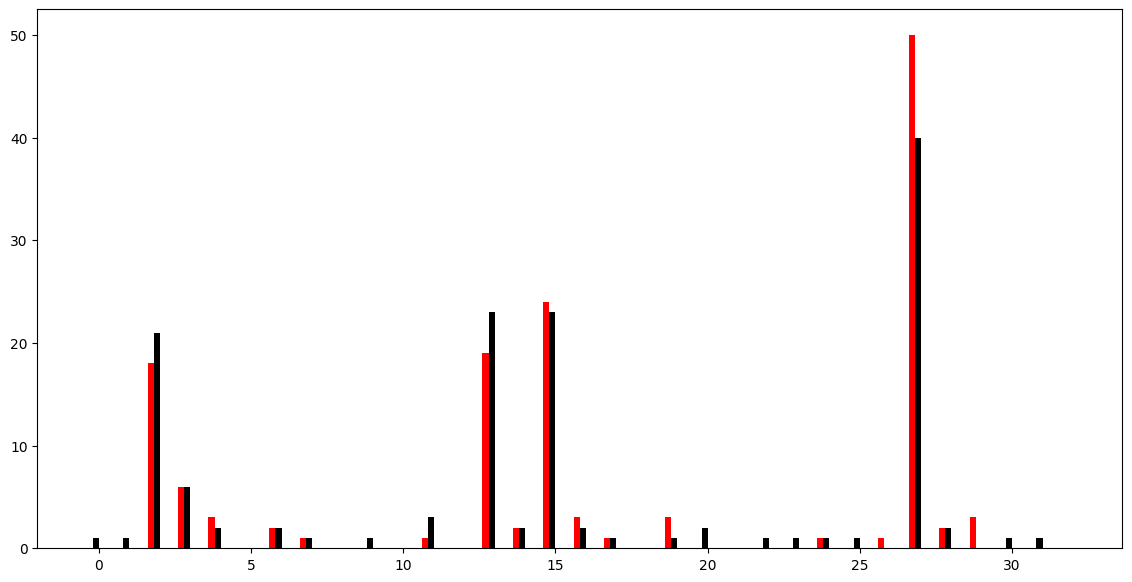

In [763]:
import warnings
import seaborn as sns


all_labels = np.unique(np.concatenate((y_train, y_test)))


print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
print_feature_importances(X.columns, grid_search_rf.best_estimator_.feature_importances_)

#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Standard & Normalized Confusion Matrices
plot_confusion_matrices(y_test, y_pred, all_labels, 19, 13)

# Prediction Histogram for comparison
plot_prediction_histogram(y_test, y_pred, all_labels)

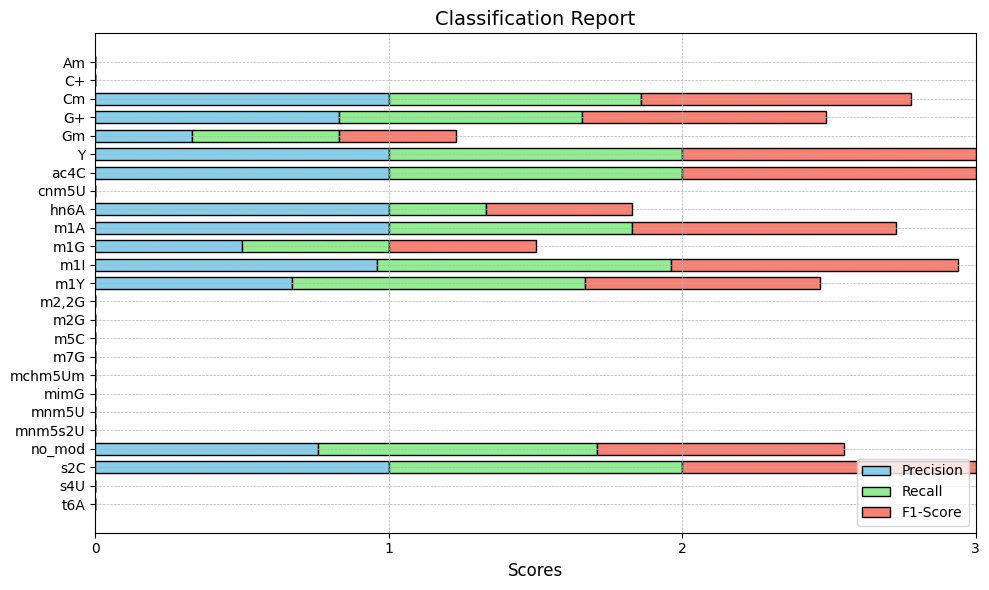

In [739]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Classification report data
data = {
    'Modification': ['Am', 'C+', 'Cm', 'G+', 'Gm', 'Y', 'ac4C', 'cnm5U', 'hn6A', 'm1A', 'm1G', 'm1I', 'm1Y', 'm2,2G', 'm2G', 'm5C', 'm7G', 'mchm5Um', 'mimG', 'mnm5U', 'mnm5s2U', 'no_mod', 's2C', 's4U', 't6A'],
    'Precision': [0.00, 0.00, 1.00, 0.83, 0.33, 1.00, 1.00, 0.00, 1.00, 1.00, 0.50, 0.96, 0.67, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.76, 1.00, 0.00, 0.00],
    'Recall': [0.00, 0.00, 0.86, 0.83, 0.50, 1.00, 1.00, 0.00, 0.33, 0.83, 0.50, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.95, 1.00, 0.00, 0.00],
    'F1-Score': [0.00, 0.00, 0.92, 0.83, 0.40, 1.00, 1.00, 0.00, 0.50, 0.90, 0.50, 0.98, 0.80, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.84, 1.00, 0.00, 0.00],
    'Support': [1, 1, 21, 6, 2, 2, 1, 1, 3, 23, 2, 23, 2, 1, 1, 2, 1, 1, 1, 1, 0, 40, 2, 1, 1]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size according to your needs
ax.barh(df['Modification'], df['Precision'], color='skyblue', edgecolor='black', height=0.65, label='Precision')
ax.barh(df['Modification'], df['Recall'], color='lightgreen', edgecolor='black', left=df['Precision'], height=0.65, label='Recall')
ax.barh(df['Modification'], df['F1-Score'], color='salmon', edgecolor='black', left=df['Precision'] + df['Recall'], height=0.65, label='F1-Score')

# Formatting
ax.set_xlabel('Scores', fontsize=12)
ax.set_title('Classification Report', fontsize=14)
ax.legend(loc='lower right')
ax.set_xlim(0, 3)  # Assuming precision, recall, and F1-score are out of 1, their total can be 3
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()  # To align the bars as in your example image

# Display grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Jesse's SVM

In [764]:


#test_training_df = pd.read_csv('training_df_with_up_and_downstream_misincorp_rates_with_negative_controls.csv', sep = '\t')
#test_training_df = pd.read_csv('training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01012024.csv', sep = '\t')
test_training_df = pd.read_csv('mi_model_files/training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01092024.csv', sep = '\t')


# subset the training_df to only include misincorporation rates
misincorp_rates = test_training_df[['A_freq', 'T_freq',
       'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq',
       'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq',
       'upstream_del_freq', 'upstream_mismatch_freq', 'downstream_A_freq',
       'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq',
       'downstream_del_freq', 'downstream_mismatch_freq']]

# standardize the misincorporation rates
misincorp_rates = StandardScaler().fit_transform(misincorp_rates)

X = misincorp_rates
y = test_training_df['known_mod']
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

print('Training set shape: ', X_train.shape, y_train.shape)

# run grid search to find the best parameters for the SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=StratifiedKFold(n_splits=10))

# fit the model
grid.fit(X_train, y_train)

# print the best parameters
# print(grid.best_params_)
# print(grid.best_estimator_)
# print(grid.best_score_)
# print(grid.best_index_)
# print(grid.scorer_)
# print(grid.n_splits_)
# print(grid.refit_time_)
# print(grid.cv_results_)
# print(grid.predict(X_test))

# make predictions on the test set
y_pred_svm = grid.predict(X_test)
# Get the best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best accuracy found: ", grid.best_score_)



Training set shape:  (209, 18) (209,)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 2/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 3/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 4/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 5/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 6/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 7/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 8/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 9/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=   0.0s
[CV 10/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/10] END C=0.1, gamma=0.0001, kernel=linear;, score=0.762 total time=   0.0s
[CV 2

Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

          Am       0.00      0.00      0.00         1
          C+       0.00      0.00      0.00         1
          Cm       0.86      0.86      0.86        21
          G+       0.56      0.83      0.67         6
          Gm       0.50      0.50      0.50         2
           Y       1.00      1.00      1.00         2
        ac4C       1.00      1.00      1.00         1
       cnm5U       0.00      0.00      0.00         1
        hn6A       0.50      0.33      0.40         3
         m1A       1.00      0.74      0.85        23
         m1G       0.50      0.50      0.50         2
         m1I       1.00      0.96      0.98        23
         m1Y       1.00      1.00      1.00         2
       m2,2G       0.33      1.00      0.50         1
      m2,2Gm       0.00      0.00      0.00         0
         m2G       0.00      0.00      0.00         1
         m5C       0.00     

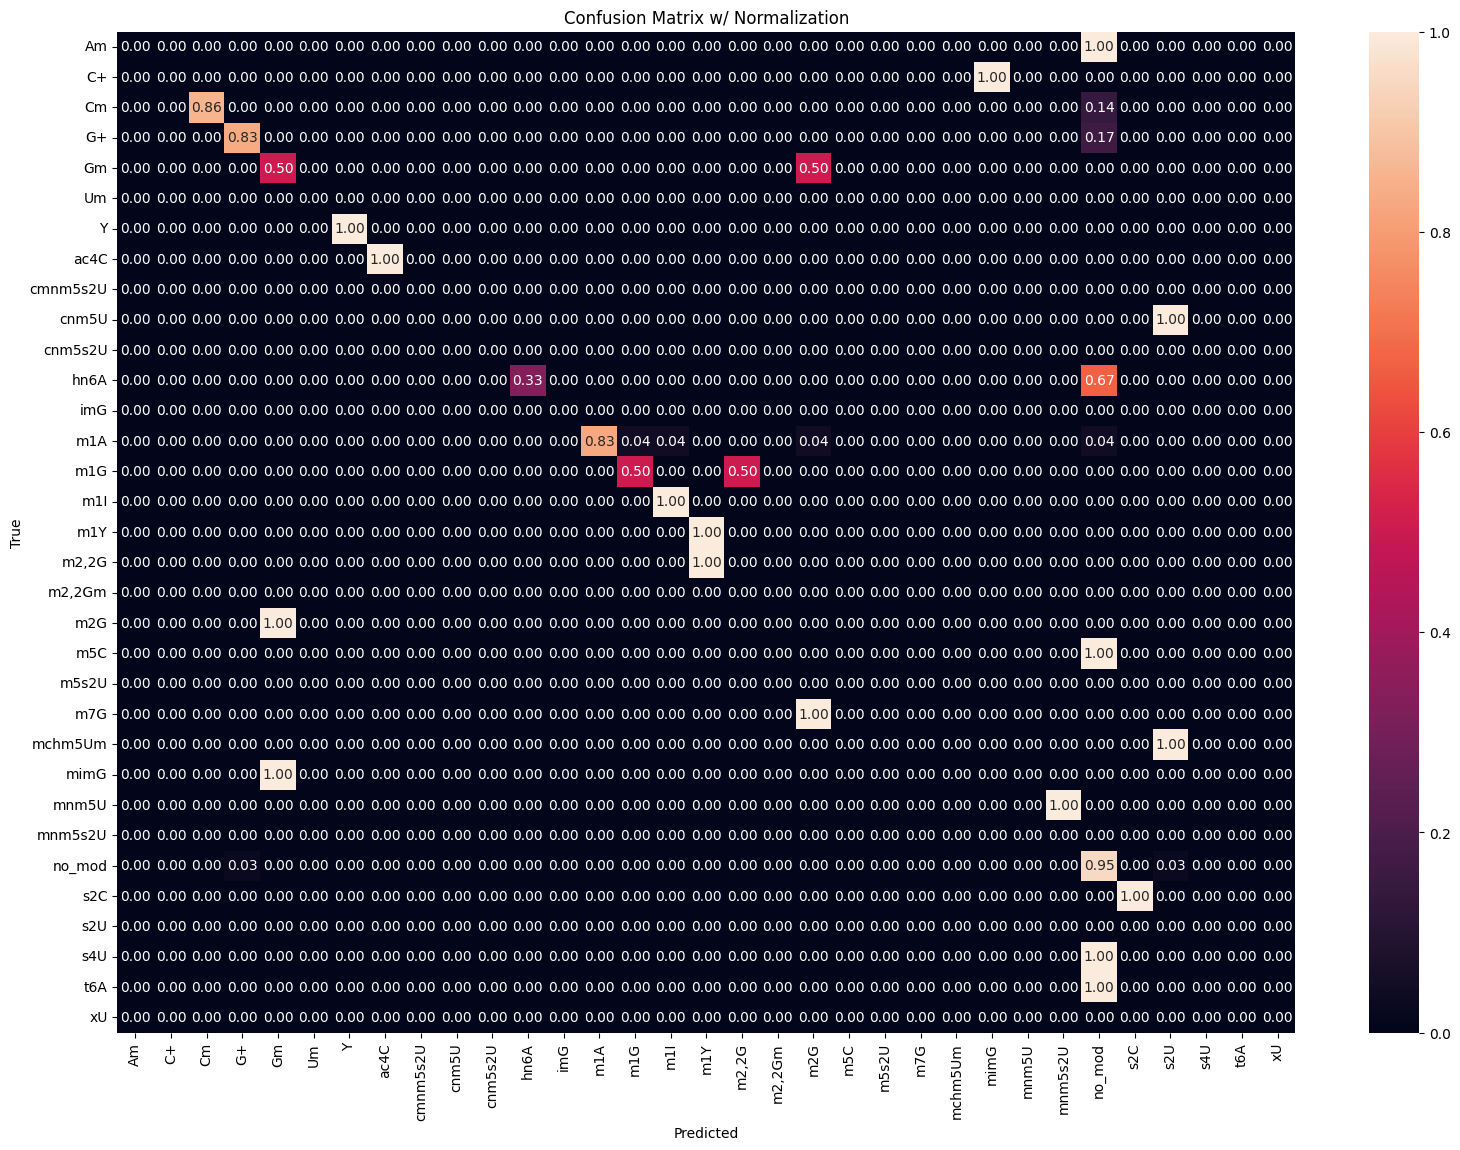

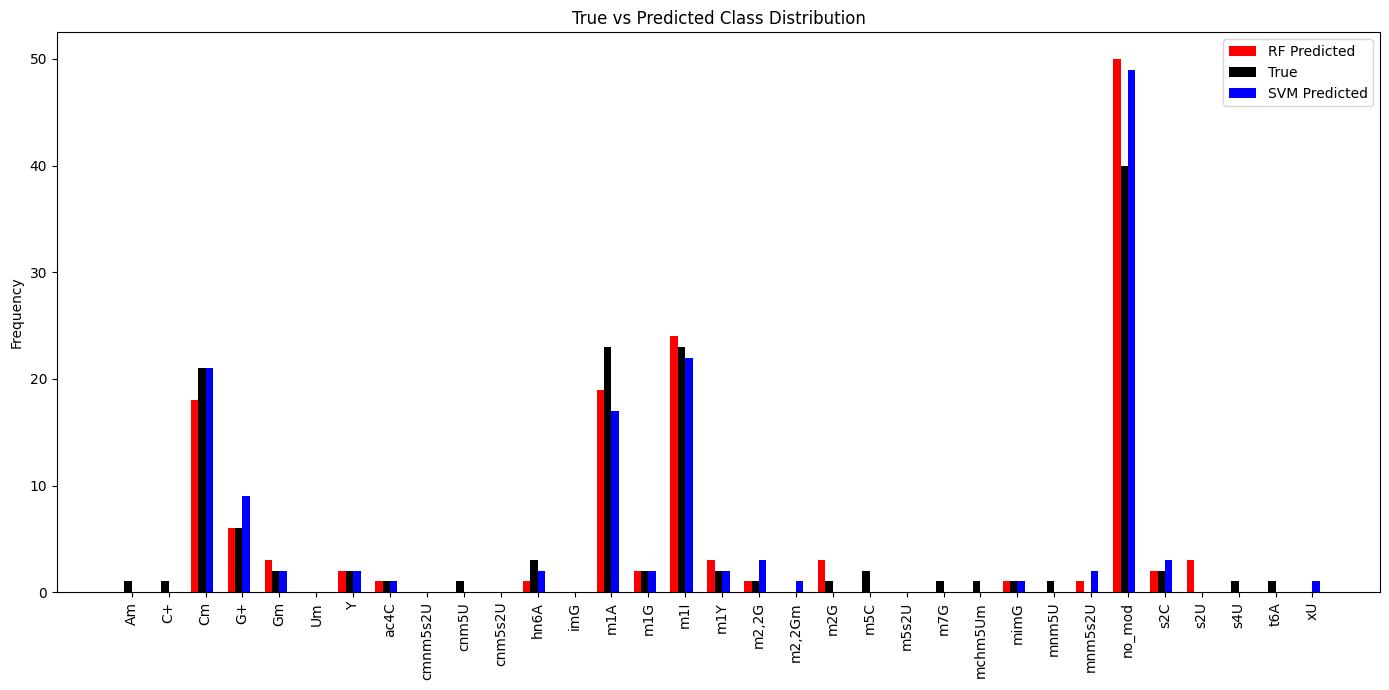

In [766]:
import warnings
import seaborn as sns


all_labels = np.unique(np.concatenate((y_train, y_test)))


print("Accuracy:", accuracy_score(y_test, y_pred_svm))


#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Standard & Normalized Confusion Matrices
plot_confusion_matrices(y_test, y_pred, all_labels, 19, 13)

# Prediction Histogram for comparison
plot_prediction_histogram(y_test, y_pred, all_labels, y_pred_svm)


## XgBoost Classifier

In [767]:
from sklearn.preprocessing import LabelEncoder

import category_encoders as ce
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut

# Assume 'df' is your DataFrame and 'known_mod' is the column with modification labels
# Loading your dataset
df = pd.read_csv('mi_model_files/training_df_with_up_and_downstream_misincorp_rates_with_negative_controls_01092024.csv', sep = '\t')

misincorp_rates = ['known_mod','A_freq', 'T_freq',
       'C_freq', 'G_freq', 'del_freq', 'mismatch_freq', 'upstream_A_freq',
       'upstream_T_freq', 'upstream_C_freq', 'upstream_G_freq',
       'upstream_del_freq', 'upstream_mismatch_freq', 'downstream_A_freq',
       'downstream_T_freq', 'downstream_C_freq', 'downstream_G_freq',
       'downstream_del_freq', 'downstream_mismatch_freq']
# Counting occurrences of each modification
mod_counts = df['known_mod'].value_counts()

# Filtering modifications that occur at least twice
valid_mods = mod_counts[mod_counts > 2].index.tolist()

# Filtering the dataset to only include rows where the modification occurs at least twice
filtered_df = df[df['known_mod'].isin(valid_mods)]

# Splitting the dataset into training and testing sets with stratification
X = filtered_df[misincorp_rates[1:]]  # Features
y = filtered_df['known_mod']  # Target modifications

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# NOTE: y_train doesn't need encoding, continue to use y_train_encoded from before if needed for multiclass


# Fit the encoder on all unique labels from both sets to avoid missing any.
all_labels = np.unique(np.concatenate((y_train, y_test)))
label_encoder = LabelEncoder().fit(all_labels)



# Transform your labels with the fitted encoder
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


'''
param_grid_xgb = {
    'learning_rate': [0.24, 0.25, 0.26],  # Step size shrinkage used to prevent overfitting
    'subsample': [0.785, 0.79, 0.795],  # Subsample ratio of the training instance
    'colsample_bytree': [0.72, 0.725, 0.73],  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGB model
xgb_model = XGBClassifier(random_state=42, objective='multi:softprob', num_class=len(np.unique(y_train_encoded)), max_depth=9, max_features='sqrt', n_estimators=100)

# Initialize the Grid Search model
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=StratifiedKFold(n_splits=10), n_jobs=-1, verbose=2, scoring='accuracy', error_score='raise')

# Fit the Grid Search to the data
grid_search_xgb.fit(X_train, y_train_encoded)

# Get the best parameters and best score
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best accuracy found: ", grid_search_xgb.best_score_)

y_pred = grid_search_xgb.predict(X_test)
'''
XGB = XGBClassifier(random_state=42, objective='multi:softprob', num_class=len(np.unique(y_train_encoded)), max_depth=9, max_features='sqrt', n_estimators=100, colsample_bytree=0.725, learning_rate=0.25, subsample=0.785)

XGB.fit(X_train, y_train_encoded)
y_pred = XGB.predict(X_test)

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test_encoded)

'''
y_encoded = label_encoder.transform(y)
loo = LeaveOneOut()
accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]  
    model = XGBClassifier(random_state=42, objective='multi:softprob', num_class=len(np.unique(y_train_encoded)), max_depth=9, max_features='sqrt', n_estimators=100, colsample_bytree=0.725, learning_rate=0.25, subsample=0.785)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Jackknife estimate of the model accuracy
jackknife_accuracy = np.mean(accuracies)

print(f"Jackknife estimate of model accuracy: {jackknife_accuracy}")
'''

Accuracy: 0.83


'\ny_encoded = label_encoder.transform(y)\nloo = LeaveOneOut()\naccuracies = []\n\nfor train_index, test_index in loo.split(X):\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y_encoded[train_index], y_encoded[test_index]  \n    model = XGBClassifier(random_state=42, objective=\'multi:softprob\', num_class=len(np.unique(y_train_encoded)), max_depth=9, max_features=\'sqrt\', n_estimators=100, colsample_bytree=0.725, learning_rate=0.25, subsample=0.785)\n\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    accuracies.append(accuracy_score(y_test, y_pred))\n\n# Jackknife estimate of the model accuracy\njackknife_accuracy = np.mean(accuracies)\n\nprint(f"Jackknife estimate of model accuracy: {jackknife_accuracy}")\n'

Accuracy: 0.83

Feature importances:
upstream_del_freq :  0.22156017
del_freq :  0.1599037
downstream_del_freq :  0.09387254
mismatch_freq :  0.07926994
T_freq :  0.05495788
C_freq :  0.047482666
downstream_G_freq :  0.04433391
upstream_C_freq :  0.03987951
G_freq :  0.03647478
downstream_T_freq :  0.032559313
upstream_G_freq :  0.029543683
downstream_C_freq :  0.02860546
downstream_mismatch_freq :  0.027032807
downstream_A_freq :  0.02543299
A_freq :  0.022232242
upstream_A_freq :  0.021435674
upstream_mismatch_freq :  0.01835006
upstream_T_freq :  0.017072683


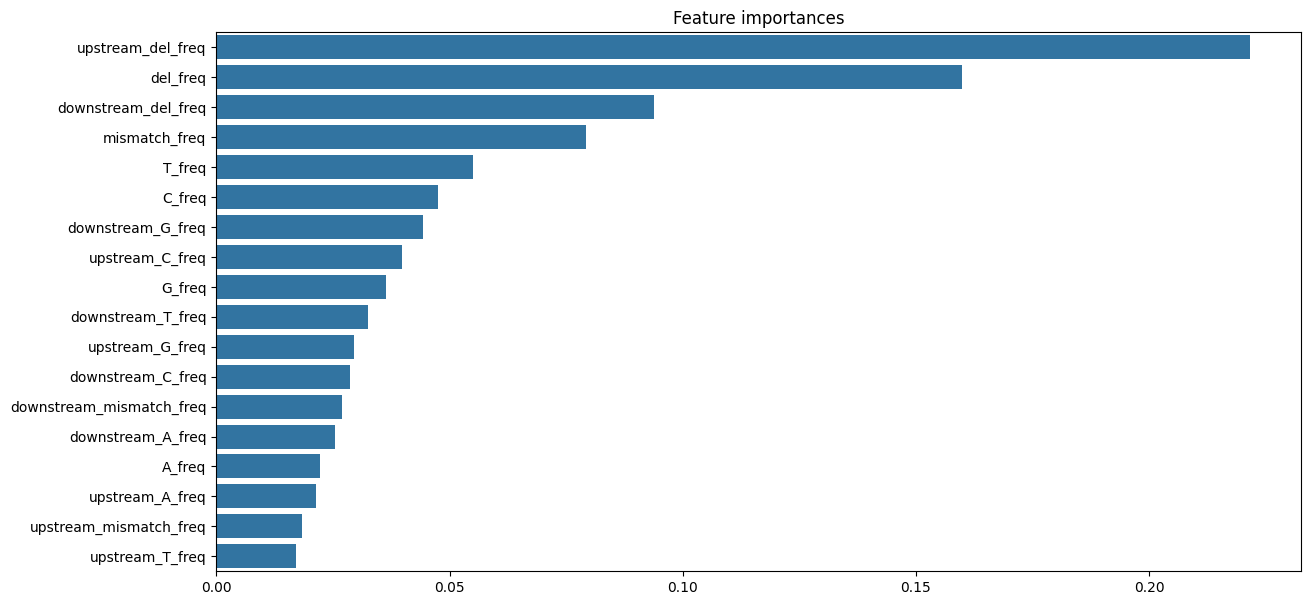

Classification Report:
               precision    recall  f1-score   support

          Cm       1.00      0.94      0.97        16
          G+       1.00      0.33      0.50         3
          Gm       0.33      0.50      0.40         2
           Y       1.00      1.00      1.00         1
        ac4C       0.00      0.00      0.00         1
        hn6A       1.00      0.50      0.67         2
         m1A       0.88      1.00      0.93        14
         m1G       1.00      0.33      0.50         3
         m1I       0.89      1.00      0.94        16
         m1Y       0.67      1.00      0.80         2
       m2,2G       0.00      0.00      0.00         2
         m2G       0.00      0.00      0.00         2
         m5C       0.00      0.00      0.00         1
        mimG       0.00      0.00      0.00         1
      no_mod       0.81      0.97      0.88        30
         s2C       0.67      1.00      0.80         2
         s2U       0.00      0.00      0.00         1
   

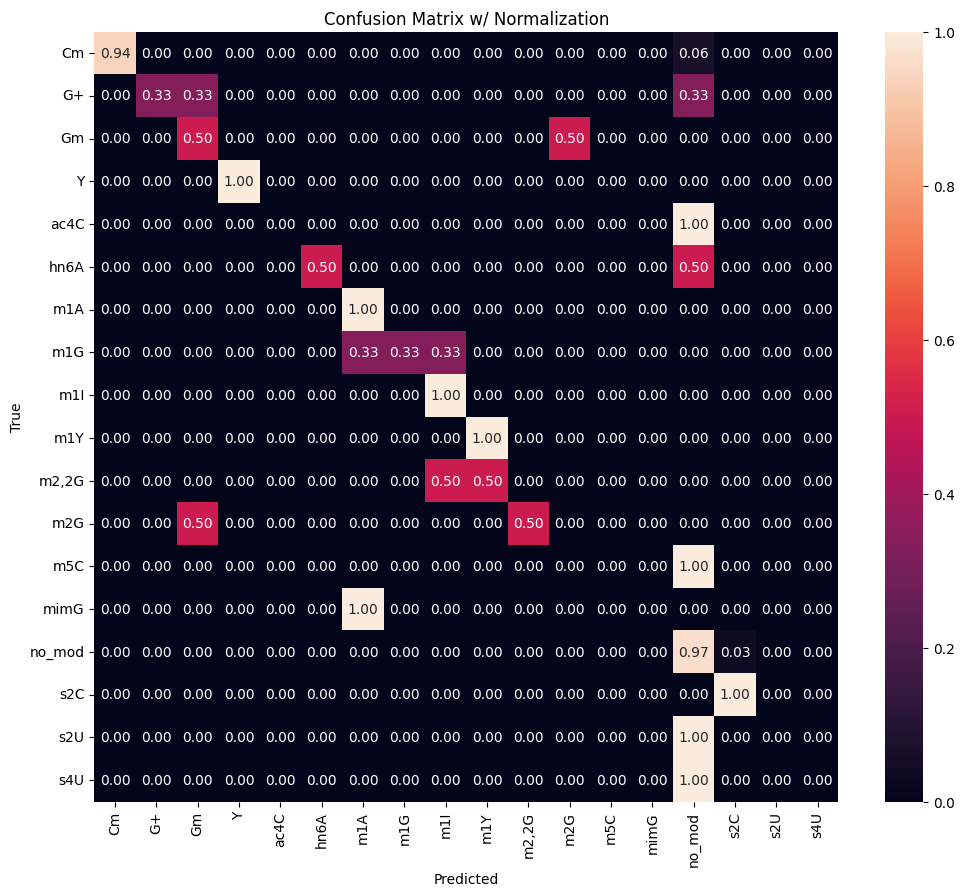

NameError: cannot access free variable 'other_pred_label_counts' where it is not associated with a value in enclosing scope

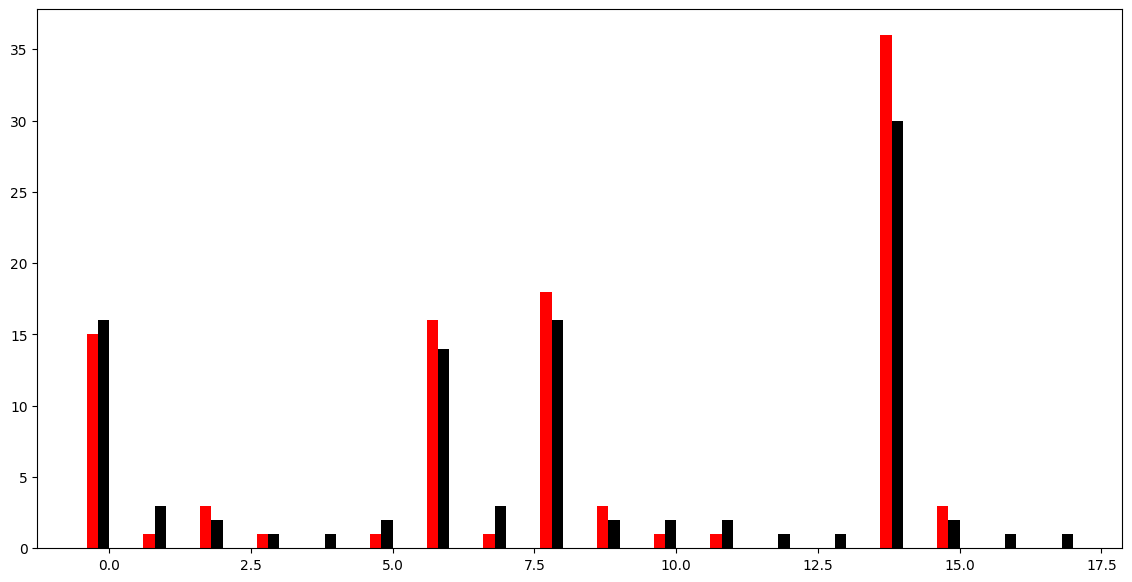

In [768]:
import warnings
import seaborn as sns



print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
print_feature_importances(X.columns, grid_search_xgb.best_estimator_.feature_importances_)

#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Standard & Normalized Confusion Matrices
plot_confusion_matrices(y_test, y_pred, all_labels, 12, 10)

# Prediction Histogram for comparison
plot_prediction_histogram(y_test, y_pred, all_labels)